In [1]:
# This is a sample script to analyze the results of measuring talker_listener.
# Please build the caret_analyze package before using it.
# The source code used for the measurement can be found here:
# https://github.com/hsgwa/trace_samples

In [2]:
import os
import sys
from pathlib import Path

# sys.path.append('/home/hasegawa/ros2_ws/install/caret_analyze_cpp_impl/lib/python3.8/site-packages')
sys.path.append(os.path.join(os.path.dirname(Path().resolve()), '..'))

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# build and source caret_analyze package
from caret_analyze import Architecture, Application, Lttng

Failed to find record_cpp_impl. the Python version will be used.


In [5]:
trace_dir_path = './talker_listener/'
lttng = Lttng(trace_dir_path, force_conversion=True)

found converted file but will re-create it: ./talker_listener/converted
converting trace directory: ./talker_listener
converted 440 events in 30 ms
output written to: ./talker_listener/converted
 [100%] [Ros2Handler]


In [6]:
arch = Architecture()
architecture_path = './talker_listener/architecture.yaml'
arch.import_file(file_path = architecture_path, file_type='yaml', latency_composer=lttng)

In [7]:
app = Application(arch)

In [8]:
node = app.nodes[0]
print('node_name: ' + node.node_name)

callback = node.callbacks[0]
print('callback_type: ' + callback.TYPE_NAME)
print('subscription topic name :' + callback.topic_name)
print('callback_name: ' + callback.callback_name)
print('callback symbol: ' + callback.symbol)
print('callback unique name: ' + callback.unique_name)

node_name: /listener
callback_type: subscription_callback
subscription topic name :/chatter
callback_name: subscription_callback_0
callback symbol: demo_nodes_cpp::Listener::Listener(rclcpp::NodeOptionsconst&)::{lambda(std::shared_ptr<std_msgs::msg::String>)#1}
callback unique name: /listener/subscription_callback_0


In [9]:
start_callback_unique_name = app.callbacks[1].unique_name
end_callback_unique_name = app.callbacks[0].unique_name
print('path search')
print('start_callback: ' + start_callback_unique_name)
print('end_callback: ' + end_callback_unique_name)

path search
start_callback: /talker/timer_callback_0
end_callback: /listener/subscription_callback_0


In [10]:
paths = app.search_paths(start_callback_unique_name, end_callback_unique_name)

In [11]:
path = paths[0]

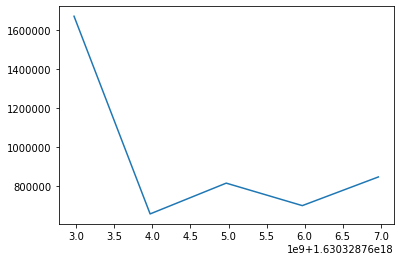

In [12]:
t, latency = path.to_timeseries()
plt.plot(t, latency)

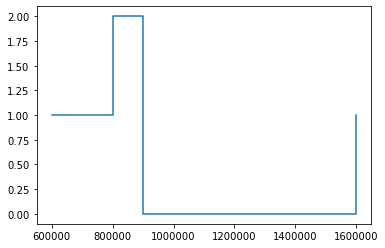

In [13]:
histogram, bins = path.to_histogram(binsize_ns=100000)
plt.step(bins[:-1], histogram, where='post')

In [14]:
df = path.to_dataframe()
df

,/talker/timer_callback_0/callback_start_timestamp/0,/talker/timer_callback_0/callback_end_timestamp/0,/talker/timer_callback_0/rclcpp_publish_timestamp/0,/talker/timer_callback_0/rcl_publish_timestamp/0,/talker/timer_callback_0/dds_write_timestamp/0,/listener/subscription_callback_0/on_data_available_timestamp/0,/listener/subscription_callback_0/callback_start_timestamp/0,/listener/subscription_callback_0/callback_end_timestamp/0
0,1630328762970045153,1630328762970772539,1630328762970618540,1630328762970623563,1630328762970625521,1630328762970874968,1630328762971310389,1630328762971716247
1,1630328763969940023,1630328763970201687,1630328763970094658,1630328763970096653,1630328763970097982,1630328763970273720,1630328763970455893,1630328763970599533
2,1630328764969999630,1630328764970309214,1630328764970197223,1630328764970199526,1630328764970201126,1630328764970447418,1630328764970661793,1630328764970816663
3,1630328765969941545,1630328765970216851,1630328765970103421,1630328765970105785,1630328765970107325,1630328765970326140,1630328765970502832,1630328765970643508
4,1630328766970007892,1630328766970350644,1630328766970213872,1630328766970216616,1630328766970218294,1630328766970485447,1630328766970700461,1630328766970856676


([<matplotlib.axis.YTick at 0x7f3b74df9cd0>,
 <a list of 8 Text yticklabel objects>)

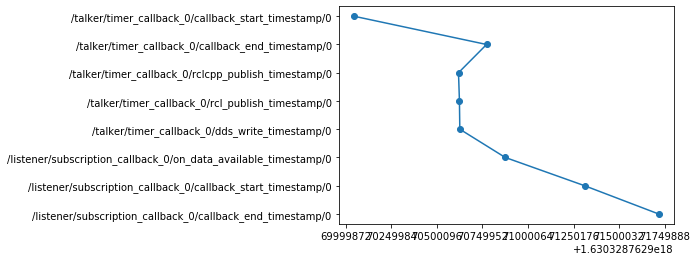

In [15]:
for i, row in df.iterrows():
    x = row.values
    y = np.array(range(len(x))) * -1
    plt.plot(x, y, marker='o')
    break

plt.yticks(y, df.columns)